In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [9]:
df = merged_df.copy()

In [5]:
# Load the base CSV
results_df = pd.read_csv("results.csv")

# Preview it
print(results_df.shape)
print(results_df.columns)
results_df.head()

(25460, 18)
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


CODE TO MERGE RACE DATA

In [6]:
# Load the races.csv file
races_df = pd.read_csv("races.csv")  # adjust path if needed

# Merge with results_df on 'raceId'
merged_df = pd.merge(results_df, races_df[['raceId', 'year', 'circuitId', 'name', 'date']],
                     on='raceId', how='left')

# Preview
print(merged_df.shape)
merged_df.head()


(25460, 22)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,date
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,2008,1,Australian Grand Prix,16/03/08
1,2,18,2,2,3,5,2,2,2,8.0,...,5696094,41,3,1:27.739,217.586,1,2008,1,Australian Grand Prix,16/03/08
2,3,18,3,3,7,7,3,3,3,6.0,...,5698779,41,5,1:28.090,216.719,1,2008,1,Australian Grand Prix,16/03/08
3,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,2008,1,Australian Grand Prix,16/03/08
4,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,2008,1,Australian Grand Prix,16/03/08


CODE TO MERGE DRIVERS

In [7]:
# Load drivers.csv
drivers_df = pd.read_csv("drivers.csv")  # adjust path if needed

# Create a full name column (optional)
drivers_df['driverName'] = drivers_df['forename'] + ' ' + drivers_df['surname']

# Merge with merged_df
merged_df = pd.merge(merged_df, drivers_df[['driverId', 'driverName', 'nationality']],
                     on='driverId', how='left')


CODE TO MERGE CONSTRUCTORS

In [8]:
# Load constructors.csv
constructors_df = pd.read_csv("constructors.csv")

# Merge with merged_df
merged_df = pd.merge(merged_df, constructors_df[['constructorId', 'name', 'nationality']],
                     on='constructorId', how='left',
                     suffixes=('', '_constructor'))

constructors_df.rename(columns={'name': 'constructor_name'}, inplace=True)


EDA

In [10]:
# Optional (for prettier charts)
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

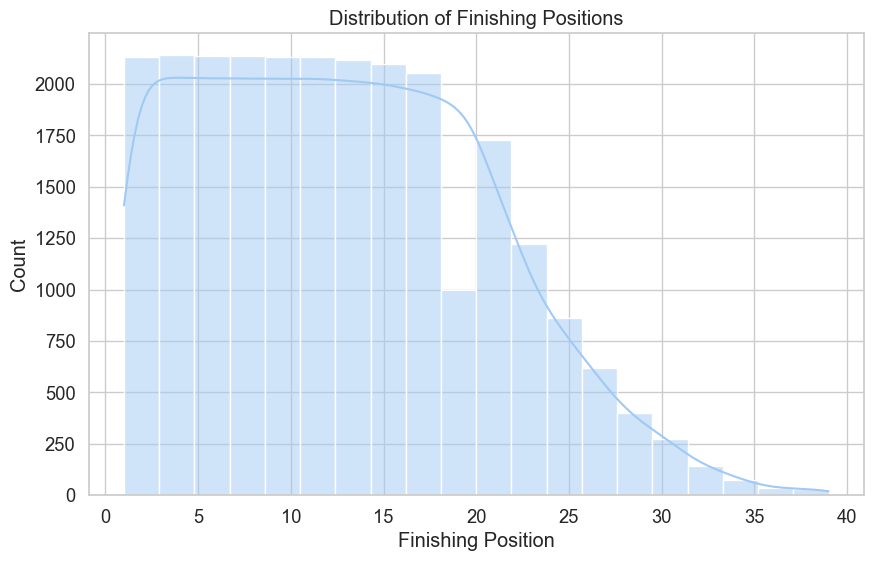

In [11]:
# Distribution of finishing positions
sns.histplot(df['positionOrder'], bins=20, kde=True)
plt.title("Distribution of Finishing Positions")
plt.xlabel("Finishing Position")
plt.ylabel("Count")
plt.show()


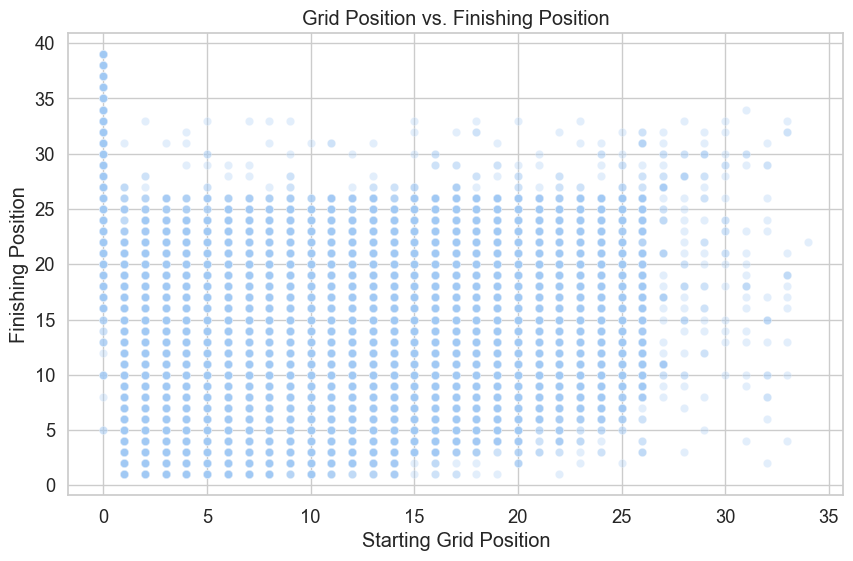

In [12]:
sns.scatterplot(x='grid', y='positionOrder', data=df, alpha=0.3)
plt.title("Grid Position vs. Finishing Position")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.show()


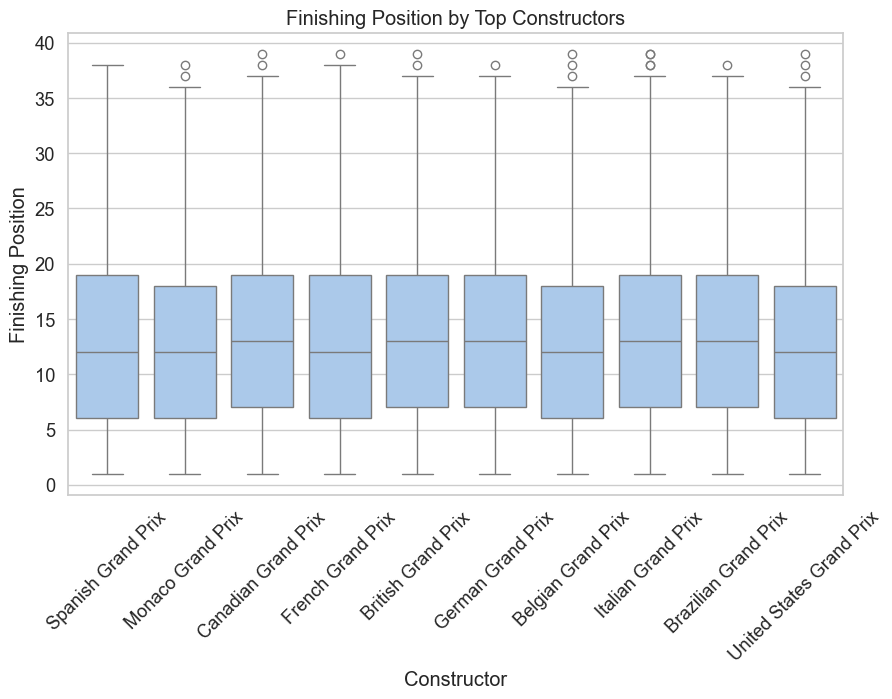

In [13]:
# ✅ Fix: Check and rename constructor column only here before plotting
if 'constructor_name' not in merged_df.columns and 'name' in merged_df.columns:
    merged_df = merged_df.rename(columns={'name': 'constructor_name'})

# ✅ Get top 10 constructors by count
top_teams = merged_df['constructor_name'].value_counts().nlargest(10).index

# ✅ Plot boxplot of finishing position by constructor
sns.boxplot(x='constructor_name', y='positionOrder',
            data=merged_df[merged_df['constructor_name'].isin(top_teams)])
plt.title("Finishing Position by Top Constructors")
plt.xticks(rotation=45)
plt.xlabel("Constructor")
plt.ylabel("Finishing Position")
plt.show()



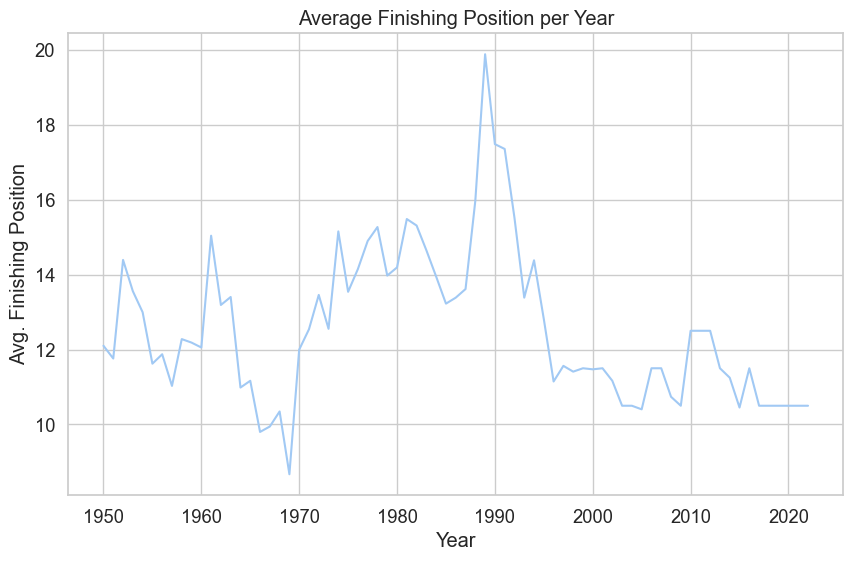

In [14]:
sns.lineplot(data=df.groupby('year')['positionOrder'].mean().reset_index(),
             x='year', y='positionOrder')
plt.title("Average Finishing Position per Year")
plt.xlabel("Year")
plt.ylabel("Avg. Finishing Position")
plt.show()


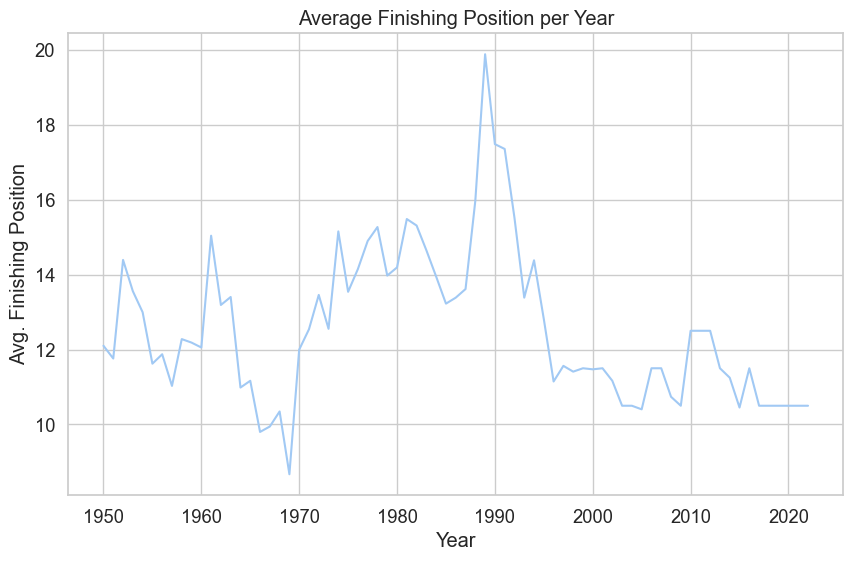

In [15]:
sns.lineplot(data=df.groupby('year')['positionOrder'].mean().reset_index(),
             x='year', y='positionOrder')
plt.title("Average Finishing Position per Year")
plt.xlabel("Year")
plt.ylabel("Avg. Finishing Position")
plt.show()

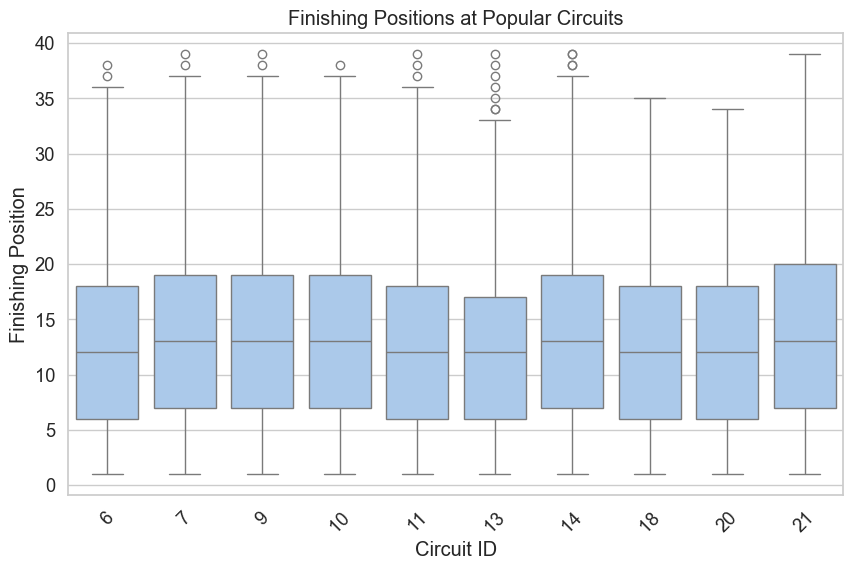

In [16]:
top_circuits = df['circuitId'].value_counts().nlargest(10).index
sns.boxplot(x='circuitId', y='positionOrder', data=df[df['circuitId'].isin(top_circuits)])
plt.title("Finishing Positions at Popular Circuits")
plt.xlabel("Circuit ID")
plt.ylabel("Finishing Position")
plt.xticks(rotation=45)
plt.show()


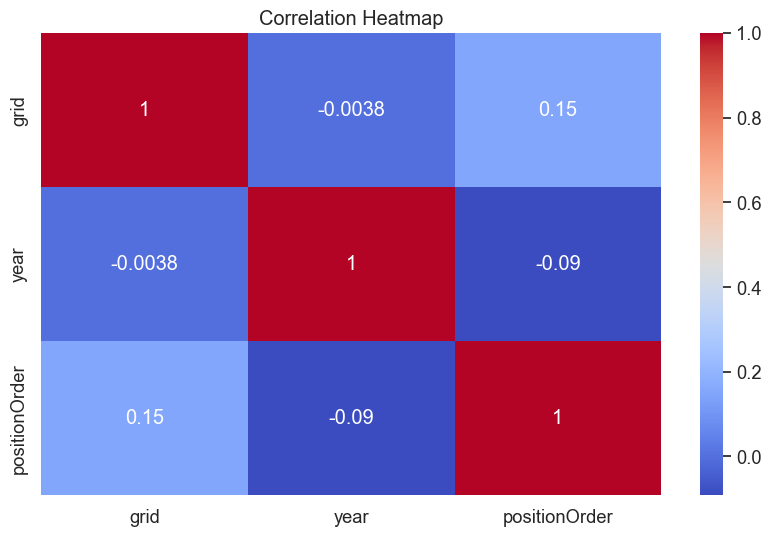

In [17]:
numeric_cols = ['grid', 'year', 'positionOrder']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
